# Методы кластеризации

# **Недостатки K-Means:**

1. Неопределенность количества кластеров – необходимо заранее задавать число кластеров (K), что не всегда очевидно.

2. Чувствительность к выбросам – одиночные выбросы могут сильно сместить центроиды и ухудшить результаты кластеризации.

3. Плохая работа с кластерами сложной формы – K-Means лучше всего работает с круглыми (сферическими) кластерами и не подходит для разделения данных с произвольной формой.

4. Чувствительность к масштабированию данных – различия в масштабе признаков могут сильно повлиять на результаты кластеризации, поэтому данные часто требуется стандартизировать.

5. Линейность границ – алгоритм использует евклидово расстояние и разделяет данные прямыми границами, что не всегда отражает реальную структуру данных.

## K-Means плохо работает с кластерами сложной формы (не сферическими)

Проблема: K-Means основан на евклидовом расстоянии и предполагает, что кластеры имеют сферическую форму. Однако в реальности кластеры могут иметь сложные формы, и K-Means не сможет их правильно разделить.

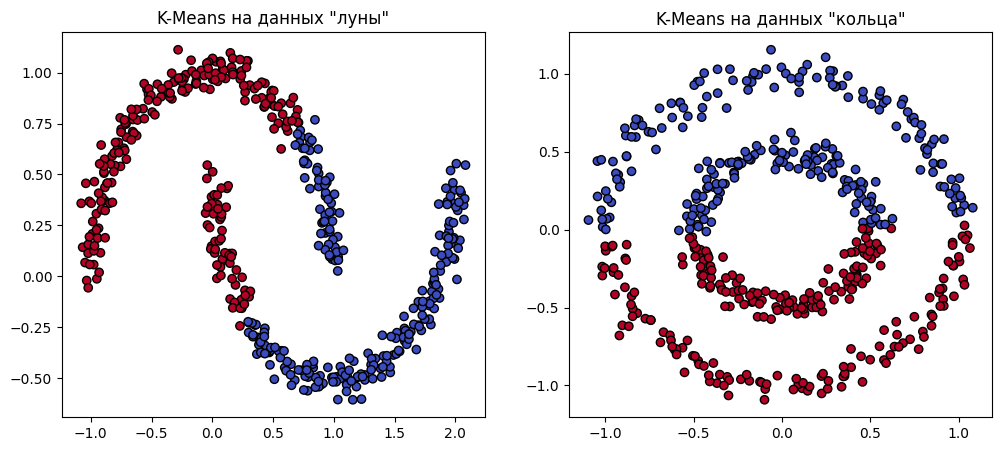

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons, make_circles

# Генерируем данные в виде "луны" и "колец"
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)
X_circles, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Применяем K-Means с K=2
kmeans_moons = KMeans(n_clusters=2, random_state=42).fit(X_moons)
kmeans_circles = KMeans(n_clusters=2, random_state=42).fit(X_circles)

# Визуализация результатов
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(X_moons[:, 0], X_moons[:, 1], c=kmeans_moons.labels_, cmap='coolwarm', edgecolors='k')
ax[0].set_title('K-Means на данных "луны"')

ax[1].scatter(X_circles[:, 0], X_circles[:, 1], c=kmeans_circles.labels_, cmap='coolwarm', edgecolors='k')
ax[1].set_title('K-Means на данных "кольца"')

plt.show()

Алгоритм пытается разделить данные на две сферические области, что не соответствует реальной структуре данных.

## Чувствительность к выбросам

Проблема: Выбросы могут сильно сместить центроиды кластеров, ухудшая качество разбиения.

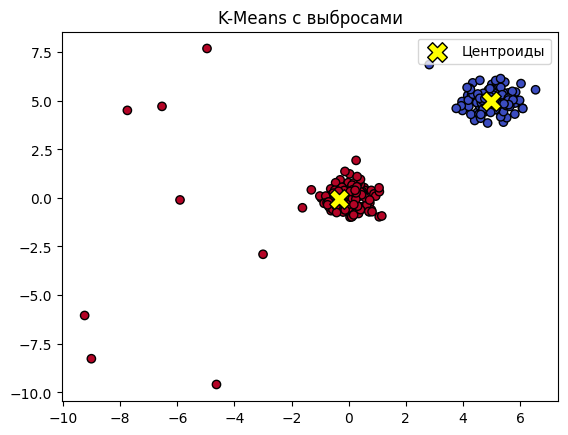

In [ ]:
from sklearn.datasets import make_blobs

# Генерируем данные с двумя плотными кластерами
X, _ = make_blobs(n_samples=300, centers=[(0, 0), (5, 5)], cluster_std=0.5, random_state=42)

# Добавляем выбросы
outliers = np.random.uniform(low=-10, high=10, size=(10, 2))
X = np.vstack([X, outliers])

# Применяем K-Means
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

# Визуализация
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='coolwarm', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', marker='X', edgecolors='k', label="Центроиды")
plt.legend()
plt.title("K-Means с выбросами")
plt.show()

## Разная плотность кластеров

Проблема: K-Means плохо работает, если у кластеров разная плотность, так как он минимизирует среднее внутрикластерное расстояние.

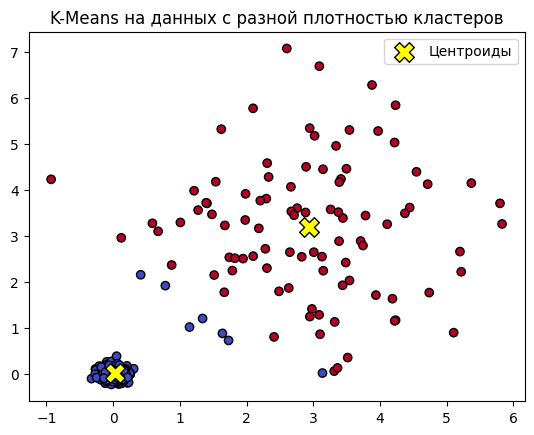

In [ ]:
X_dense, _ = make_blobs(n_samples=400, centers=[(0, 0)], cluster_std=0.1, random_state=42)
X_sparse, _ = make_blobs(n_samples=100, centers=[(3, 3)], cluster_std=1.5, random_state=42)
X = np.vstack([X_dense, X_sparse])

# Применяем K-Means
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

# Визуализация
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='coolwarm', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', marker='X', edgecolors='k', label="Центроиды")
plt.legend()
plt.title("K-Means на данных с разной плотностью кластеров")
plt.show()

# Иерархическая кластеризация

Иерархическая кластеризация, как следует из названия, представляет собой алгоритм, который строит иерархию кластеров.

Иерархическая кластеризация (англ. hierarchical clustering) — множество алгоритмов кластеризации, направленных на создание иерархии вложенных разбиений исходного множества объектов.

Для визуального представления результатов кластеризации используется дендрограмма — дерево, построенное по матрице мер близости между кластерами. В узлах дерева находятся подмножества объектов из обучающей выборки. При этом на каждом ярусе дерева множество объектов из всех узлов составляет исходное множество объектов. Объединение узлов между ярусами соответствует слиянию двух кластеров. При этом длина ребра соответствует расстоянию между кластерами.

**Иерархическая кластеризация разделена на два типа :**

- Агломеративная иерархическая кластеризация

В Агломеративная иерархическая кластеризация, Каждая точка данных рассматривается как один кластер, что формирует общее количество кластеров, равных количеству точек данных. И тогда мы продолжаем группировать данные на основе метрик сходства, делая кластеры, поскольку мы перемещаемся в иерархию. Этот подход также называется подходом снизу вверх.

- Дивизионный метод иерархической кластеризации

Диспектива иерархическая кластеризация противоположна тому, что агломеративный ХК. Здесь мы начинаем с одного кластера, состоящего из всех точек данных. С каждой итерацией мы отделяем точки, которые далеки от других на основе метрик расстояния до тех пор, пока каждый кластер имеет ровно 1 точку данных.

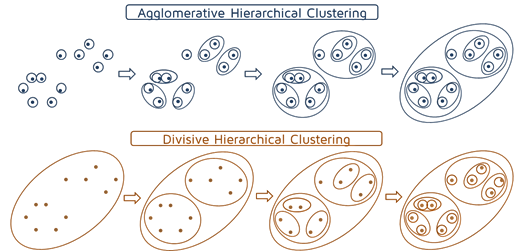

Результат иерархической кластеризации может быть представлен с помощью дендрограммы.

**Дендрограмма** — древовидная диаграмма, содержащая n количество уровней, представляющих собой каждый шаг процесса последовательного укрупнения кластеров.

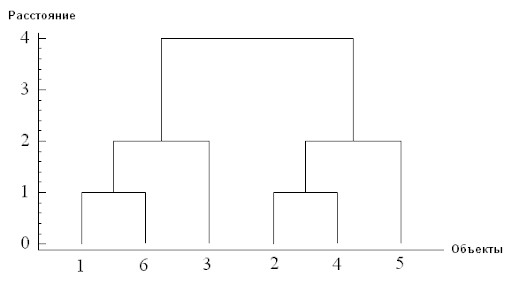

- По оси Х откладываются объекты
- по оси У расстояние между объектами

На оси X у дендрограммы расположены названия объектов, а на оси Y — расстояние, на котором соответствующие объекты, кластеры, объединяются друг с другом.

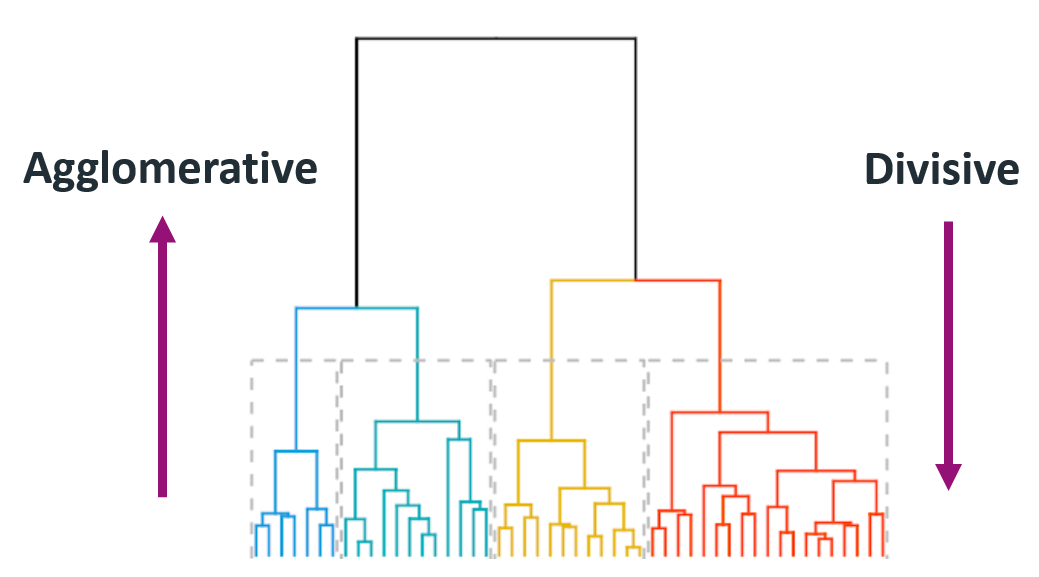

Scikit-learn (sklearn) реализует только агломерационную кластеризацию.

Scipy - иерархическая кластеризация.

По сравнению с K-средних агломерационные алгоритмы более громоздки и плохо масштабируются для больших наборов данных.
- Агломерационные алгоритмы больше подходят для статистических исследований.
- Эти алгоритмы предлагают преимущество создания полного спектра вложенных кластерных решений.

In [ ]:
# установим библиотеку для работы с датасетами на kaggle
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data")

df = pd.read_csv("/content/unsupervised-learning-on-country-data/Country-data.csv")
# {"username":"adele1997","key":"b455b34a14df6c01a6a95866d44d6f13"}
# Создадим вектор признаков
X = df.iloc[:, 1:]

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adele1997
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data


In [ ]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


**Ниже приведены шаги, связанные с агломеративной кластеризацией:**

1. Вначале рассматривайте каждую точку данных как один кластер. Таким образом, число кластеров в начале будет равно K, а K-целое число, представляющее количество точек данных.
2. Сформируйте кластер, соединив две ближайшие точки данных, в результате чего получатся кластеры K-1.
3. Сформируйте больше кластеров, соединив два ближайших кластера, что приведет к кластерам K-2.
4. Повторяйте описанные выше три шага, пока не образуется один большой кластер.
5. Как только один кластер сформирован, дендрограммы используются для разделения на несколько кластеров в зависимости от проблемы. Мы подробно рассмотрим концепцию дендрограммы в следующем разделе.

Существуют различные способы определения расстояния между кластерами. Само расстояние может быть евклидовым или манхэттенским.

`scipy.cluster.hierarchy.linkage(X, method='single', metric='euclidean', optimal_ordering=False)`

- **method:** методы расчета расстояния между вновь сформированным кластером и каждым из них
- **metric:** метрика расстояния (евклидово расстояние, например)

Есть несколько способов пересчета расстояния между кластерами после их объединения. По-английски эти способы называются Linkage:
1. Первый способ — **Single Linkage**, и в нем расстояние между кластерами вычисляется как минимальное между всеми парами объектов из разных кластеров.
2. Второй способ — **Complete Linkage**. В нем расстояние между кластерами считается как максимальное расстояние между парами объектов из разных кластеров.
3. **Average Linkage** — это просто среднее расстояние между всеми парами объектов из разных кластеров.
4. **Centroid Linkage** — это расстояние между центроидами разных кластеров.
5. **Ward Linkage** — это немного модифицированный Centroid Linkage с учетом размеров самих кластеров.

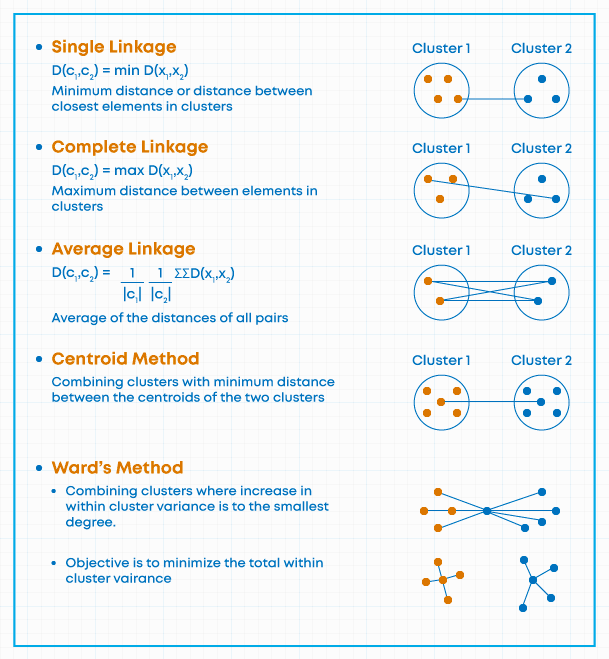

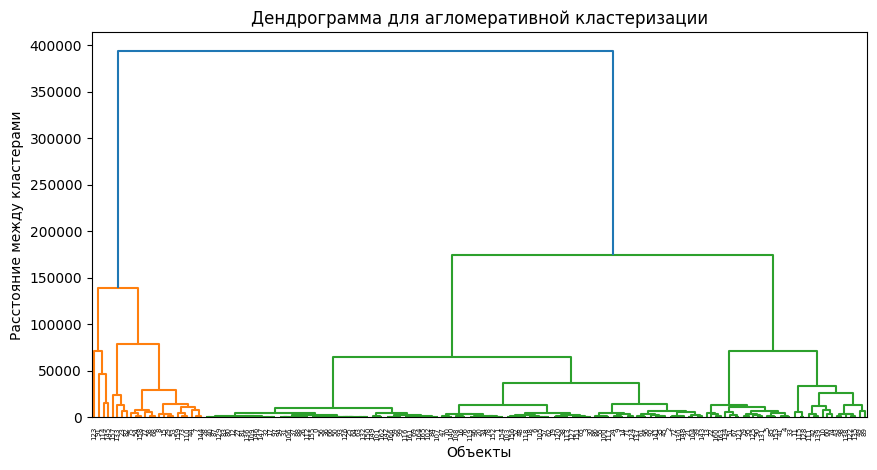

CPU times: user 2.99 s, sys: 457 ms, total: 3.44 s
Wall time: 8.51 s


In [ ]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Строим матрицу расстояний (linkage matrix)
Z = linkage(X, method="ward")  # Метод Уорда для минимизации дисперсии

# Строим дендрограмму
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Дендрограмма для агломеративной кластеризации")
plt.xlabel("Объекты")
plt.ylabel("Расстояние между кластерами")
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage

Z = linkage(X, method='average', metric='euclidean')
Z[120]

array([  15.        ,  267.        , 2624.11512314,    3.        ])

**В результате в переменной Z мы имеем табличку из четырех столбцов:**

- Первые два столбца содержат в себе индексы объектов, которые на этом шаге будут объединяться.
- Третий столбец содержит расстояние, на котором эти два объекта будут объединяться.
- Четвертый столбец показывает нам, какой размер кластера получится после объединения на этом шаге.

In [ ]:
from scipy.cluster.hierarchy import fcluster

# fcluster - метод разбиения на кластеры
# принимает на вход: матрицу расстояний
# критерий разделения на кластеры
y_pred = fcluster(Z, 5.4, criterion='distance')
# label = fcluster(Z, n_clusters=5, criterion='n_clusters')

np.unique(y_pred)
# обратите внимание что в отличии kmeans или AgglomerativeClustering
# нумерация кластеров с 1

In [ ]:
# Применяем агломеративную кластеризацию
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage="ward")
clusters = agg_clustering.fit_predict(X)

# **Недостатки Иерархической кластеризации:**

1. Высокая вычислительная сложность – алгоритм требует хранения и обновления матрицы расстояний, что делает его медленным при большом количестве объектов (обычно O(n²) или O(n³)).
2. Неадаптивность к выбросам – иерархические методы не имеют встроенных механизмов для обработки шумовых данных.
3. Отсутствие возможности переобучения – если добавляются новые точки, алгоритм нужно запускать заново, в отличие от K-Means, который можно дообучать.
4. Зависимость от метрики расстояния – выбор способа измерения расстояний между кластерами (например, single-linkage, complete-linkage) может существенно повлиять на результат.
5. Сложность интерпретации при больших данных – дендрограммы быстро становятся сложными и трудночитаемыми.

## Высокая вычислительная сложность

In [ ]:
import time
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# Функция для измерения времени работы алгоритма
def measure_time(n_samples):
    X, _ = make_blobs(n_samples=n_samples, centers=5, random_state=42)
    start_time = time.time()
    clustering = AgglomerativeClustering(n_clusters=5).fit(X)
    return time.time() - start_time

# Измеряем время работы на разных размерах данных
# 50 000 - уже выходим за рамки RAM и colab падает
sizes = [100, 500, 1000, 5000, 10000]
times = [measure_time(n) for n in sizes]

for size, t in zip(sizes, times):
    print(f"Число объектов: {size}, Время выполнения: {t:.4f} сек")

Число объектов: 100, Время выполнения: 0.0232 сек
Число объектов: 500, Время выполнения: 0.0109 сек
Число объектов: 1000, Время выполнения: 0.0605 сек
Число объектов: 5000, Время выполнения: 1.6564 сек
Число объектов: 10000, Время выполнения: 5.6373 сек


**Вывод:**
- Для 100 объектов алгоритм работает быстро.
- Для 5000 объектов время значительно увеличивается.
- При 10000+ объектов иерархическая кластеризация становится практически неприменимой.

Решение:
Использовать более быстрые методы, например, K-Means или DBSCAN.

## Влияние выбросов

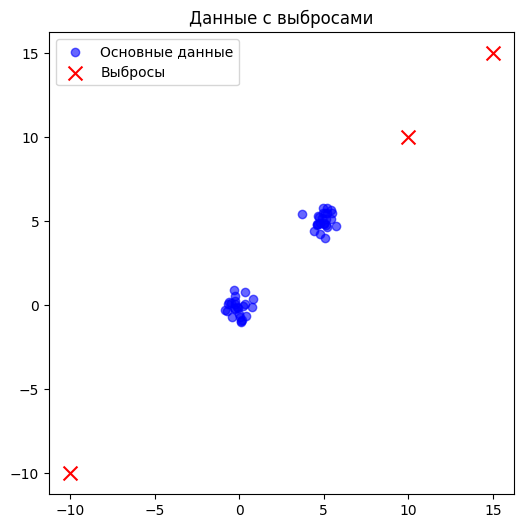

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# 1. Генерируем данные (две группы кластеров)
X, _ = make_blobs(n_samples=50, centers=[(0, 0), (5, 5)], cluster_std=0.5, random_state=42)

# 2. Добавляем выбросы
outliers = np.array([[10, 10], [-10, -10], [15, 15]])
X_with_outliers = np.vstack([X, outliers])

# Визуализируем данные с выбросами
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], label="Основные данные", c='blue', alpha=0.6)
plt.scatter(outliers[:, 0], outliers[:, 1], label="Выбросы", c='red', marker='x', s=100)
plt.legend()
plt.title("Данные с выбросами")
plt.show()

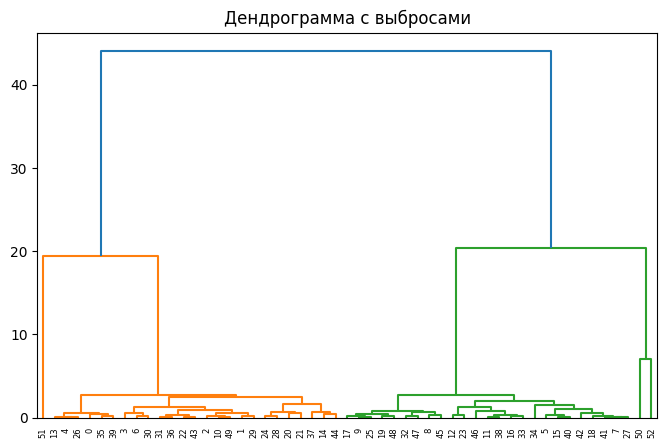

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Строим дендрограмму
plt.figure(figsize=(8, 5))
linkage_matrix = linkage(X_with_outliers, method='ward')
dendrogram(linkage_matrix)
plt.title("Дендрограмма с выбросами")
plt.show()

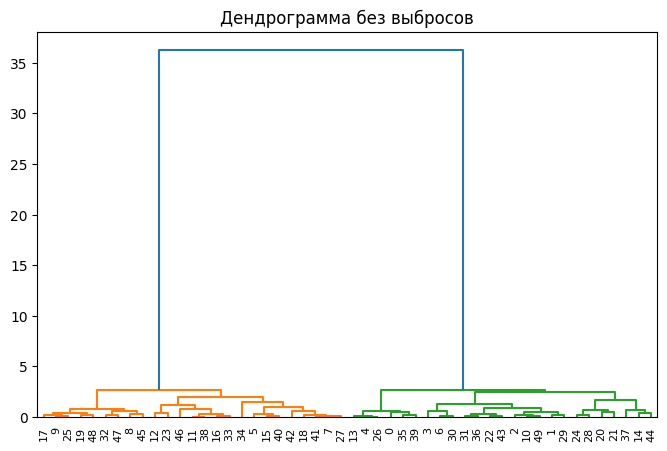

In [ ]:
# 4. Удаляем выбросы вручную (например, отбрасываем точки с x или y > 8 или < -8)
mask = (X_with_outliers[:, 0] < 8) & (X_with_outliers[:, 0] > -8) & \
       (X_with_outliers[:, 1] < 8) & (X_with_outliers[:, 1] > -8)
X_clean = X_with_outliers[mask]

# 5. Строим дендрограмму без выбросов
plt.figure(figsize=(8, 5))
linkage_matrix_clean = linkage(X_clean, method='ward')
dendrogram(linkage_matrix_clean)
plt.title("Дендрограмма без выбросов")
plt.show()

## Зависимость от метрики расстояний

Проблема:

Разные методы вычисления расстояний (single-linkage, complete-linkage и т. д.) могут давать разные результаты.

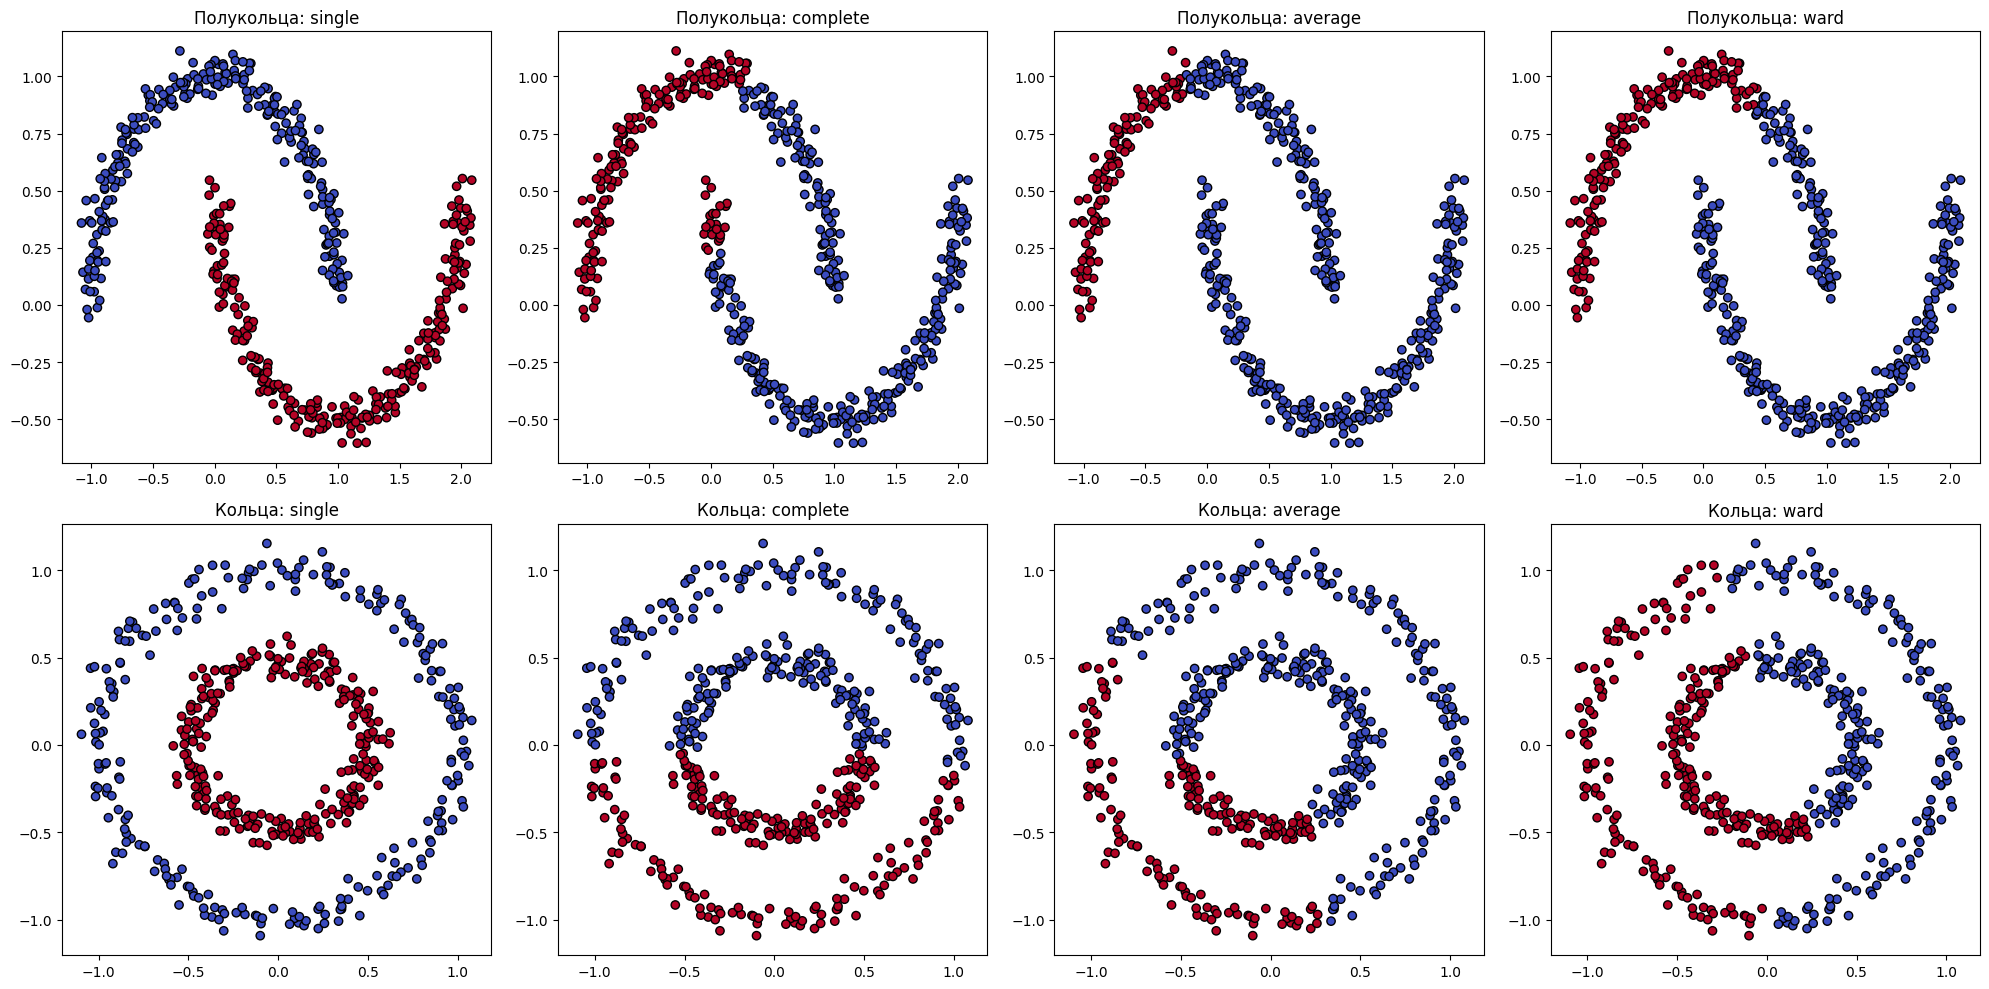

In [ ]:
# БЕЗ ВЫБРОСОВ
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles

# Генерируем данные
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)
X_circles, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Методы связывания
methods = ['single', 'complete', 'average', 'ward']
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Верхний ряд - кластеризация "полуколец"
for method, ax in zip(methods, axes[0]):
    clustering = AgglomerativeClustering(n_clusters=2, linkage=method).fit(X_moons)
    ax.scatter(X_moons[:, 0], X_moons[:, 1], c=clustering.labels_, cmap='coolwarm', edgecolors='k')
    ax.set_title(f"Полукольца: {method}")

# Нижний ряд - кластеризация "колец"
for method, ax in zip(methods, axes[1]):
    clustering = AgglomerativeClustering(n_clusters=2, linkage=method).fit(X_circles)
    ax.scatter(X_circles[:, 0], X_circles[:, 1], c=clustering.labels_, cmap='coolwarm', edgecolors='k')
    ax.set_title(f"Кольца: {method}")

plt.tight_layout()
plt.show()

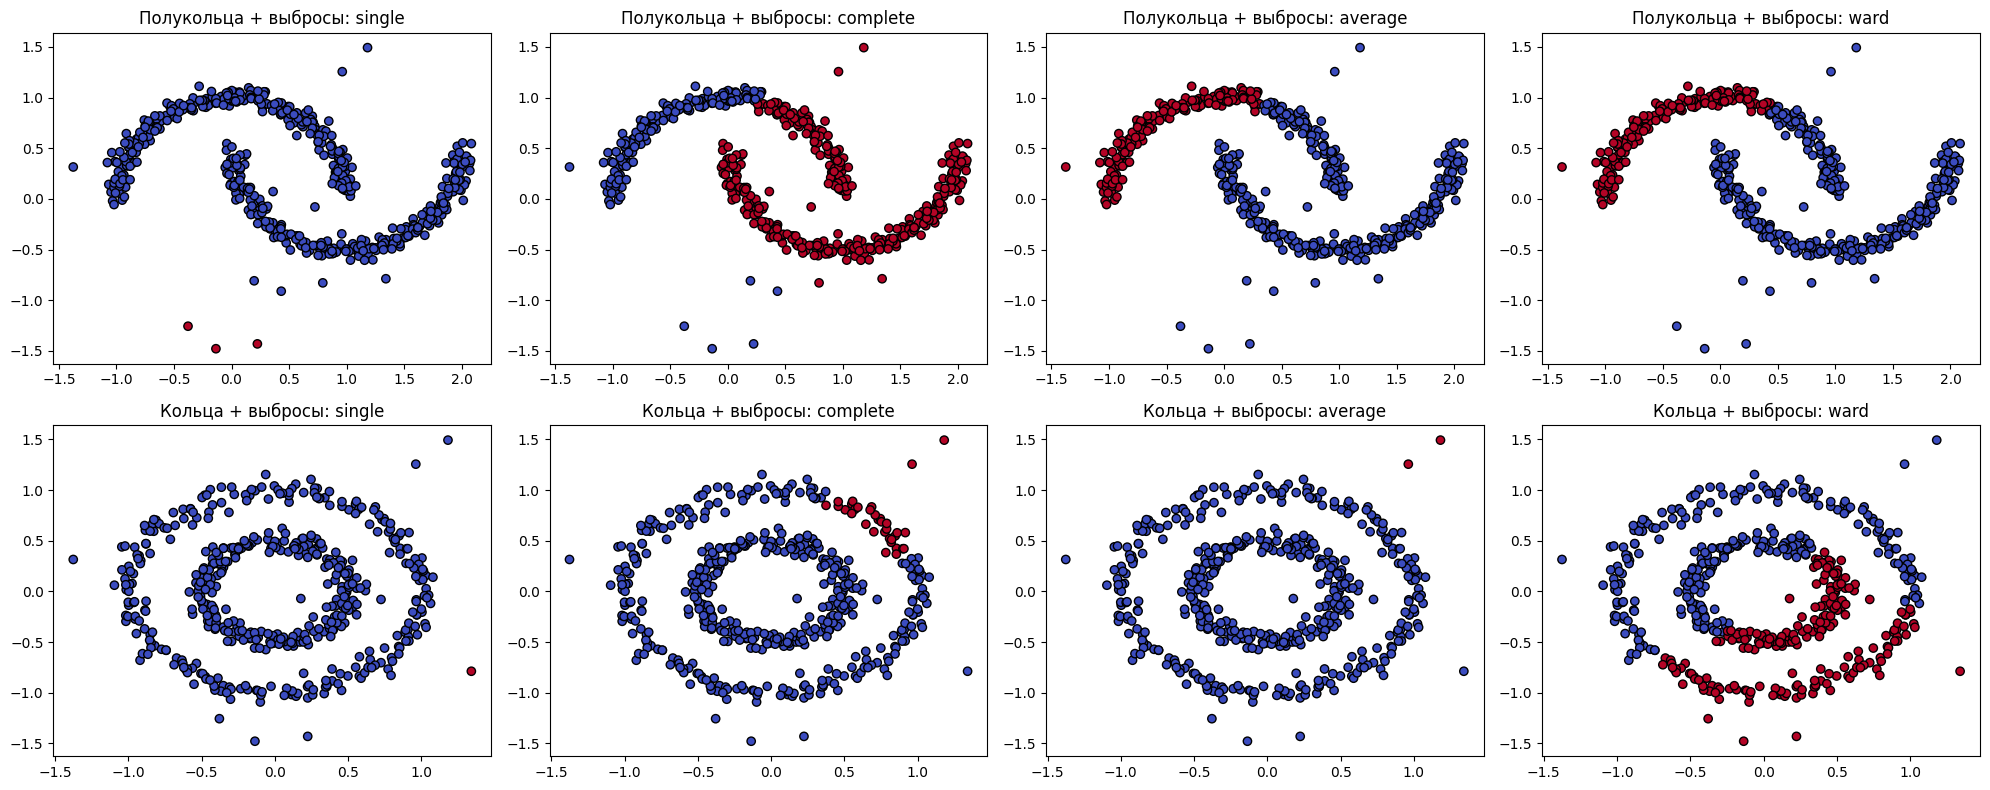

In [ ]:
# С ВЫБРОСАМИ
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles

# Генерируем данные
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)
X_circles, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Добавляем выбросы
outliers = np.random.uniform(low=-1.5, high=1.5, size=(15, 2))  # 15 случайных точек
X_moons_with_outliers = np.vstack([X_moons, outliers])
X_circles_with_outliers = np.vstack([X_circles, outliers])

# Методы связывания
methods = ['single', 'complete', 'average', 'ward']
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Верхний ряд - кластеризация "полуколец" с выбросами
for method, ax in zip(methods, axes[0]):
    clustering = AgglomerativeClustering(n_clusters=2, linkage=method).fit(X_moons_with_outliers)
    ax.scatter(X_moons_with_outliers[:, 0], X_moons_with_outliers[:, 1],
               c=clustering.labels_, cmap='coolwarm', edgecolors='k')
    # ax.scatter(outliers[:, 0], outliers[:, 1], c='black', marker='x', s=100, label="Выбросы")  # Отдельно отмечаем выбросы
    ax.set_title(f"Полукольца + выбросы: {method}")

# Нижний ряд - кластеризация "колец" с выбросами
for method, ax in zip(methods, axes[1]):
    clustering = AgglomerativeClustering(n_clusters=2, linkage=method).fit(X_circles_with_outliers)
    ax.scatter(X_circles_with_outliers[:, 0], X_circles_with_outliers[:, 1],
               c=clustering.labels_, cmap='coolwarm', edgecolors='k')
    # ax.scatter(outliers[:, 0], outliers[:, 1], c='black', marker='x', s=100, label="Выбросы")  # Отдельно отмечаем выбросы
    ax.set_title(f"Кольца + выбросы: {method}")

plt.tight_layout()
plt.show()

# DBSCAN

DBSCAN – это один из самых популярных методов кластеризации, основанный на плотности. В отличие от K-Means и иерархической кластеризации, DBSCAN не требует заранее задавать количество кластеров. Он способен выявлять кластеры произвольной формы и эффективно обрабатывать выбросы.

**Ключевые особенности DBSCAN:**
1. Не требует заранее задавать число кластеров.
2. Выделяет выбросы, не относящиеся ни к одному кластеру.
3. Хорошо работает с кластерами произвольной формы.
4. Основан на понятии плотности точек в пространстве.
5. Может плохо работать с данными, где плотность распределена неравномерно.

**Метод DBSCAN использует два ключевых параметра:**
- `ε (эпсилон, eps)` – радиус окрестности точки, в пределах которого ищутся соседние точки.
- `MinPts` – минимальное количество точек в окрестности eps, чтобы точку можно было считать "плотной".

# Алгоритм DBSCAN

1. Выбирается случайная точка из датасета.
2. Определяется, сколько соседей у нее в радиусе `eps`.
    - Если их больше или равно `MinPts`, эта точка становится основной (`core point`).
    - Если меньше `MinPts`, точка считается шумом.

3. Все точки, попавшие в окрестность `eps`, добавляются в этот кластер.
4. Процесс рекурсивно повторяется для всех соседних точек, пока кластер не перестанет расширяться.
5. Когда процесс для одного кластера завершен, алгоритм выбирает новую несмотренную точку и повторяет шаги 1-4.

**Три типа точек в DBSCAN:**
1. `Core point` (основная точка) – если у нее ≥ MinPts соседей в радиусе eps.
2. `Border point` (граничная точка) – находится в eps-окрестности core-точки, но сама не является core-точкой.
3. `Noise point` (шум/выброс) – не принадлежит ни одному кластеру.

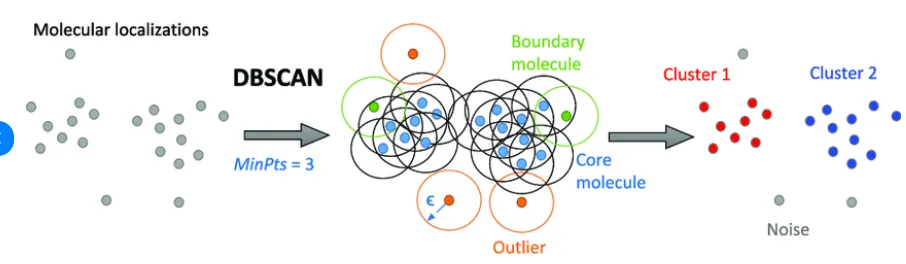

Для визуального представления можете воспользоваться сайтом:

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

И попробовать посмотреть визуализацию работы DBSCAN на различных примерах.

<ipython-input-2-bb20840a5c47>:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


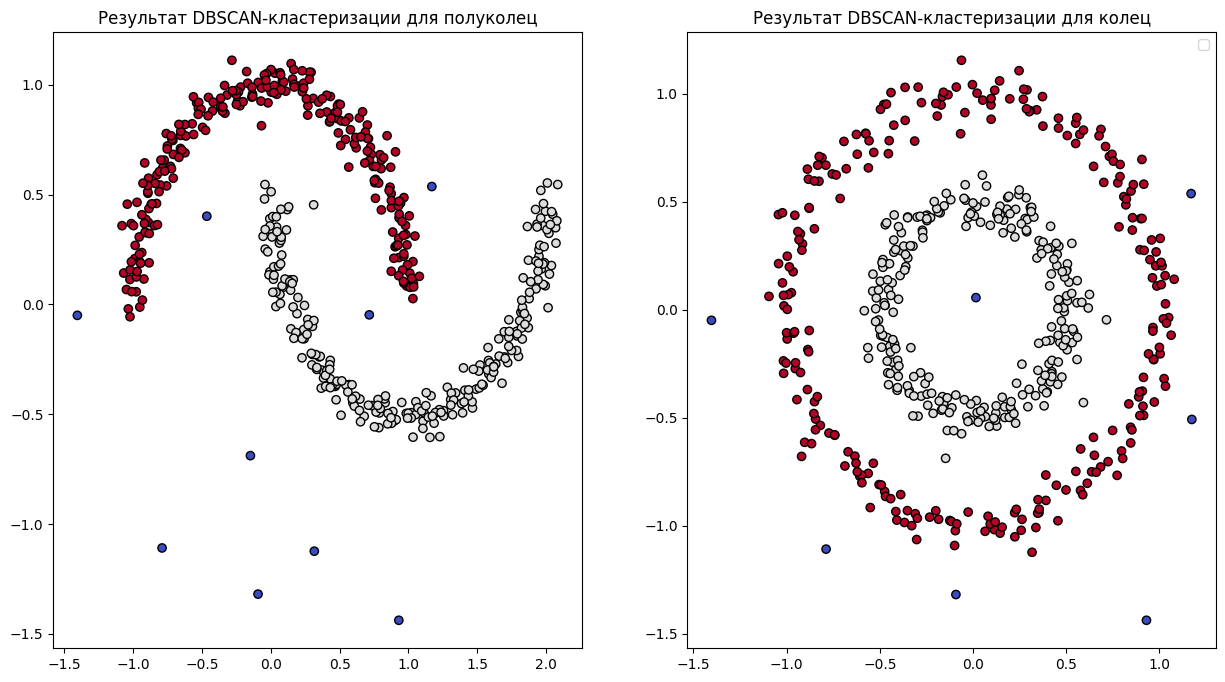

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.datasets import make_moons, make_circles

# Генерируем данные
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)
X_circles, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Добавляем выбросы
outliers = np.random.uniform(low=-1.5, high=1.5, size=(15, 2))  # 15 случайных точек
X_moons = np.vstack([X_moons, outliers])
X_circles = np.vstack([X_circles, outliers])

# Применяем DBSCAN для X_moons
dbscan_moons = DBSCAN(eps=0.2, min_samples=5)
labels_moons = dbscan_moons.fit_predict(X_moons)

# Применяем DBSCAN для X_circles
dbscan_circles = DBSCAN(eps=0.2, min_samples=5)
labels_circles = dbscan_circles.fit_predict(X_circles)

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Визуализация кластеров
axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap='coolwarm', edgecolors='k')
axes[0].set_title("Результат DBSCAN-кластеризации для полуколец")

# Визуализация кластеров
axes[1].scatter(X_circles[:, 0], X_circles[:, 1], c=labels_circles, cmap='coolwarm', edgecolors='k')
axes[1].set_title("Результат DBSCAN-кластеризации для колец")

plt.legend()
plt.show()

In [ ]:
np.unique(labels_moons)

array([-1,  0,  1])

## Выбор параметров eps и MinPts

1. Выбор `eps`:
- Если `eps` слишком мал, алгоритм разобьет кластеры на фрагменты.
- Если `eps` слишком велик, может объединить раздельные кластеры.

**Способ подбора: построить k-distance graph, сортируя расстояния до k-ближайшего соседа.**

2. Выбор `MinPts`:

Рекомендуется `MinPts = 2 * число измерений (например, если 2D данные, то MinPts ≈ 4)`.

Чем больше MinPts, тем плотнее должны быть кластеры.

**Как определить eps?**

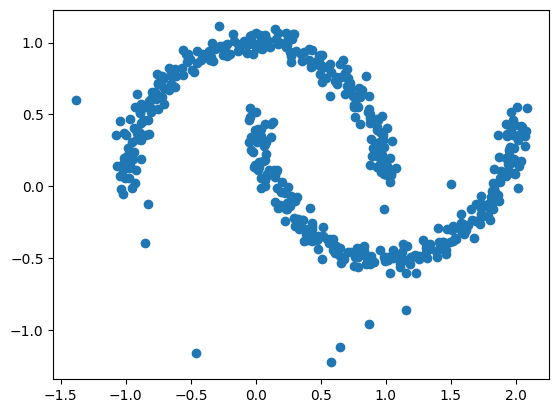

In [ ]:
# Генерируем данные
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

# Добавляем выбросы
outliers = np.random.uniform(low=-1.5, high=1.5, size=(15, 2))  # 15 случайных точек
X_moons = np.vstack([X_moons, outliers])

plt.scatter(X_moons[:, 0], X_moons[:, 1])

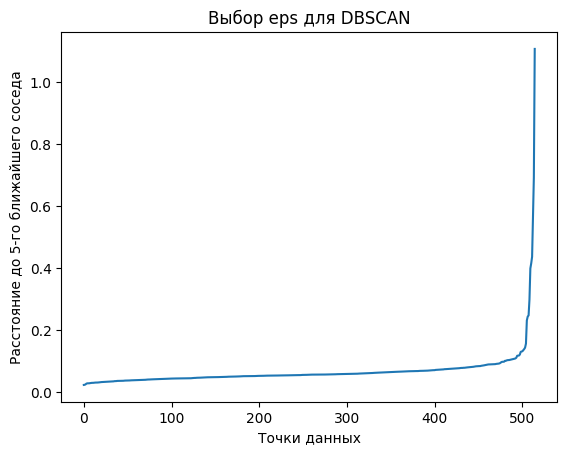

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Ищем расстояния до 5 ближайших соседей
nbrs = NearestNeighbors(n_neighbors=5).fit(X_moons)
distances, _ = nbrs.kneighbors(X_moons)

# Берем 5-е расстояние, сортируем и строим график
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.xlabel("Точки данных")
plt.ylabel("Расстояние до 5-го ближайшего соседа")
plt.title("Выбор eps для DBSCAN")
plt.show()

# На графике ищем "излом" – это и есть оптимальное значение eps.

<ipython-input-16-6984287b5a58>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


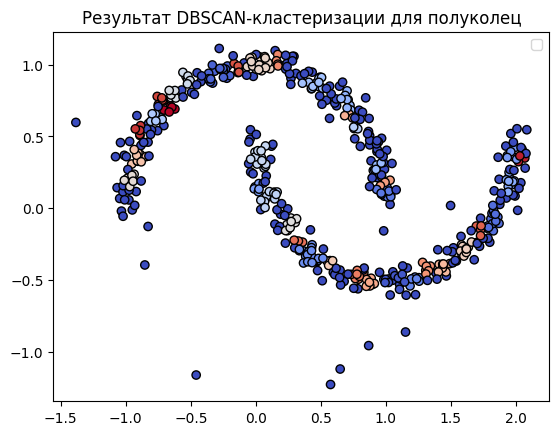

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Применяем DBSCAN для X_moons
dbscan_moons = DBSCAN(eps=0.05, min_samples=5)
labels_moons = dbscan_moons.fit_predict(X_moons)

# Визуализация кластеров
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap='coolwarm', edgecolors='k')
plt.title("Результат DBSCAN-кластеризации для полуколец")

plt.legend()
plt.show()

<ipython-input-20-64cf0764e14b>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


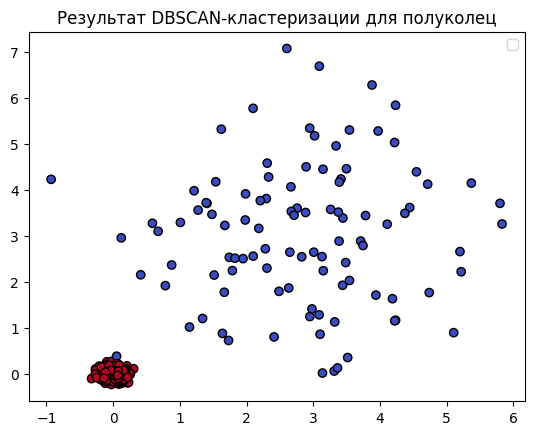

In [ ]:
from sklearn.datasets import make_blobs
X_dense, _ = make_blobs(n_samples=400, centers=[(0, 0)], cluster_std=0.1, random_state=42)
X_sparse, _ = make_blobs(n_samples=100, centers=[(3, 3)], cluster_std=1.5, random_state=42)
X = np.vstack([X_dense, X_sparse])

# Применяем DBSCAN для X_moons
dbscan_moons = DBSCAN(eps=0.1, min_samples=5)
labels_moons = dbscan_moons.fit_predict(X)

# Визуализация кластеров
plt.scatter(X[:, 0], X[:, 1], c=labels_moons, cmap='coolwarm', edgecolors='k')
plt.title("Результат DBSCAN-кластеризации для полуколец")

plt.legend()
plt.show()

In [ ]:
np.unique(labels_moons)
# т.е. синие точки он отметил как выбросы (а не кластер, хотя так их интерпретировть можно в данном случае)

array([-1,  0])

# Продвинутые варианты DBSCAN

1. **OPTICS (Ordering Points To Identify Clustering Structure)**. Улучшенный DBSCAN, который автоматически определяет eps для каждой области. Работает лучше, когда плотность кластеров разная.

2. **HDBSCAN (Hierarchical DBSCAN)**. Иерархическое улучшение DBSCAN. Определяет плотность в динамическом режиме.

<ipython-input-21-7bdd1178d15f>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


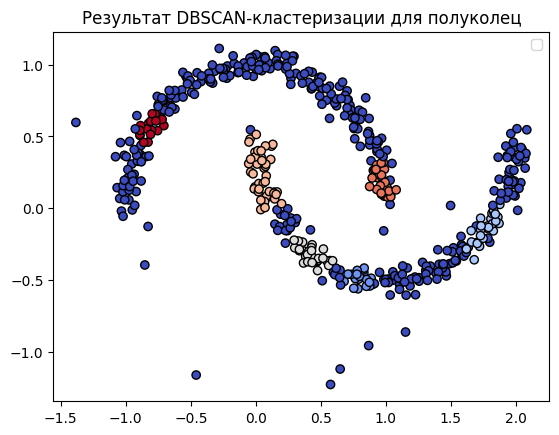

In [ ]:
from sklearn.cluster import OPTICS
import numpy as np

optics_clusters = OPTICS(min_samples=20).fit(X_moons)

# Визуализация кластеров
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=optics_clusters.labels_, cmap='coolwarm', edgecolors='k')
plt.title("Результат DBSCAN-кластеризации для полуколец")

plt.legend()
plt.show()

<ipython-input-26-ca6b9b6101f0>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


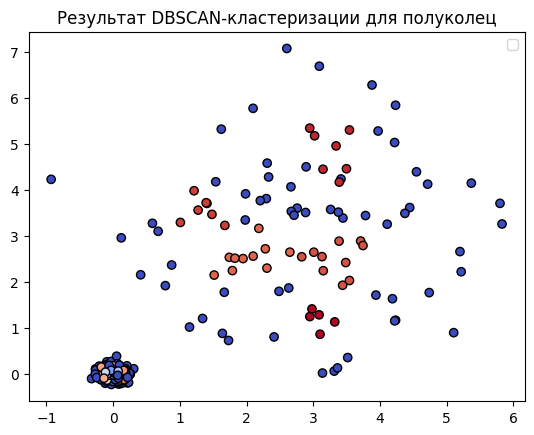

In [ ]:
X_dense, _ = make_blobs(n_samples=400, centers=[(0, 0)], cluster_std=0.1, random_state=42)
X_sparse, _ = make_blobs(n_samples=100, centers=[(3, 3)], cluster_std=1.5, random_state=42)
X = np.vstack([X_dense, X_sparse])

optics_clusters = OPTICS(min_samples=5).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=optics_clusters.labels_, cmap='coolwarm', edgecolors='k')
plt.title("Результат DBSCAN-кластеризации для полуколец")

plt.legend()
plt.show()

In [ ]:
np.unique(optics_clusters.labels_)

array([-1,  0,  1])